# Marketing
Find out the good and bad customers . <br>
Amount spent > Avg spend  = Good <br>
Amount spent < Avg spend = bad

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy.builtins
from patsy import dmatrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as st
%matplotlib inline

In [188]:
data = pd.read_csv("D:/IPBA/Statistical Modelling/Logistic/1. Logistic Regression in Python Demo Part 1/dm.csv")
print(data.shape)
data.head()

(1000, 11)


,Cust_Id,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,12,Young,Male,Rent,Single,Far,20400,0,Medium,18,867
1,14,Middle,Female,Rent,Single,Close,58600,1,Medium,6,624
2,15,Old,Female,Rent,Married,Close,84800,0,High,18,2624
3,16,Old,Male,Own,Married,Far,33000,0,Medium,12,979
4,16,Middle,Female,Rent,Married,Close,73000,1,Medium,6,490


# EDA and Data Cleaning

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cust_Id      1000 non-null   int64 
 1   Age          1000 non-null   object
 2   Gender       1000 non-null   object
 3   OwnHome      1000 non-null   object
 4   Married      1000 non-null   object
 5   Location     1000 non-null   object
 6   Salary       1000 non-null   int64 
 7   Children     1000 non-null   int64 
 8   History      697 non-null    object
 9   Catalogs     1000 non-null   int64 
 10  AmountSpent  1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [190]:
data.isnull().sum()

Cust_Id          0
Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

The data types need to be changed for categorical variables and the categories need to be converted into numerical categories. 
The null values in History need to be handled

Creating a new column(target) based on the Amount spent and dropping the column AmountSpent <br>
1 = Good <br>
0 = Bad 

In [191]:
df = data.copy()
m = df['AmountSpent'].mean()
df['CustType'] = df['AmountSpent'].map(lambda x : 1 if x > m else 0)
df = df.drop('AmountSpent' , axis=1)
df.head()

,Cust_Id,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,CustType
0,12,Young,Male,Rent,Single,Far,20400,0,Medium,18,0
1,14,Middle,Female,Rent,Single,Close,58600,1,Medium,6,0
2,15,Old,Female,Rent,Married,Close,84800,0,High,18,1
3,16,Old,Male,Own,Married,Far,33000,0,Medium,12,0
4,16,Middle,Female,Rent,Married,Close,73000,1,Medium,6,0


Doing a feature wise analysis and cleaning the data

# Age

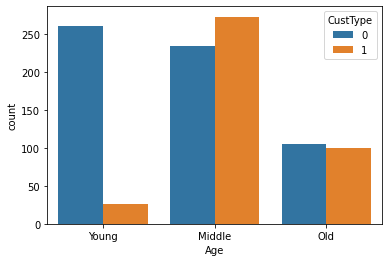

In [192]:
sns.countplot(x='Age' , hue='CustType' , data=df)
plt.show()

In [193]:
print("Before Encoding\n")
print(df['Age'].value_counts())
print("\nAfter Encoding")
o = OrdinalEncoder(categories=[['Young','Middle','Old']])
df['Age']=o.fit_transform(df[['Age']])
df['Age'].value_counts()

Before Encoding

Middle    508
Young     287
Old       205
Name: Age, dtype: int64

After Encoding


1.0    508
0.0    287
2.0    205
Name: Age, dtype: int64

# Gender

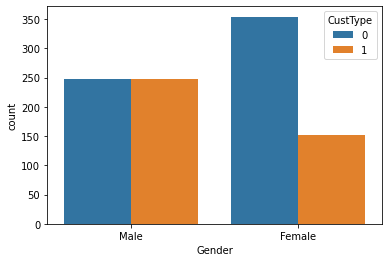

In [194]:
sns.countplot(x='Gender' , hue='CustType' , data=df)
plt.show()

In [195]:
print("Before Encoding\n")
print(df['Gender'].value_counts())
print("\nAfter Encoding")
o = OrdinalEncoder(categories=[['Female','Male']])
df['Gender']=o.fit_transform(df[['Gender']])
df['Gender'].value_counts()

Before Encoding

Female    506
Male      494
Name: Gender, dtype: int64

After Encoding


0.0    506
1.0    494
Name: Gender, dtype: int64

# Own Home

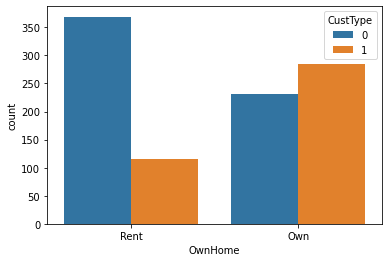

In [196]:
sns.countplot(x='OwnHome' , hue='CustType' , data=df)
plt.show()

In [197]:
print("Before Encoding\n")
print(df['OwnHome'].value_counts())
print("\nAfter Encoding")
o = OrdinalEncoder(categories=[['Rent' , 'Own']])
df['OwnHome']=o.fit_transform(df[['OwnHome']])
df['OwnHome'].value_counts()

Before Encoding

Own     516
Rent    484
Name: OwnHome, dtype: int64

After Encoding


1.0    516
0.0    484
Name: OwnHome, dtype: int64

# Marital Status

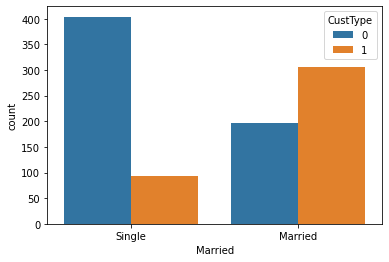

In [198]:
sns.countplot(x='Married' , hue='CustType' , data=df)
plt.show()

In [199]:
print("Before Encoding\n")
print(df['Married'].value_counts())
print("\nAfter Encoding")
o = OrdinalEncoder(categories=[['Single','Married']])
df['Married']=o.fit_transform(df[['Married']])
df['Married'].value_counts()

Before Encoding

Married    502
Single     498
Name: Married, dtype: int64

After Encoding


1.0    502
0.0    498
Name: Married, dtype: int64

# Location

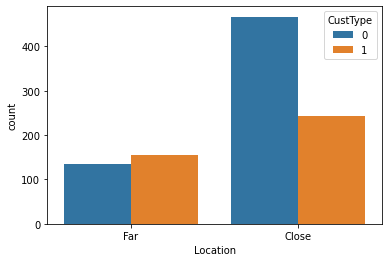

In [200]:
sns.countplot(x='Location' , hue='CustType' ,data=df)
plt.show()

In [201]:
print("Before Encoding\n")
print(df['Location'].value_counts())
print("\nAfter Encoding")
o = OrdinalEncoder(categories=[['Close','Far']])
df['Location']=o.fit_transform(df[['Location']])
df['Location'].value_counts()

Before Encoding

Close    710
Far      290
Name: Location, dtype: int64

After Encoding


0.0    710
1.0    290
Name: Location, dtype: int64

# Salary

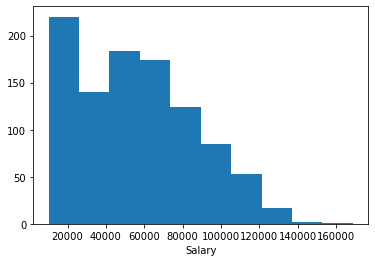

In [202]:
plt.hist(df['Salary'])
plt.xlabel('Salary')
plt.show()

It is a continuous variable . Creating 3 buckets for salary and converting it into a categorical variable.

In [203]:
df['Salary'].describe()

count      1000.000000
mean      56103.900000
std       30616.314826
min       10100.000000
25%       29975.000000
50%       53700.000000
75%       77025.000000
max      168800.000000
Name: Salary, dtype: float64

# Children

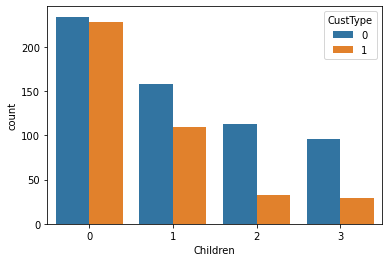

In [204]:
sns.countplot(x='Children' , hue='CustType' , data=df)
plt.show()

# History
This variable contains null values. Handling them first.

In [205]:
df['History']=np.where(df['History'].isnull() , "New_Cust", df['History'])
df['History'].unique()

array(['Medium', 'High', 'Low', 'New_Cust'], dtype=object)

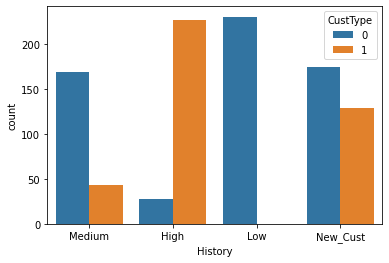

In [206]:
sns.countplot(x='History' , hue='CustType' , data=df)
plt.show()

In [207]:
print("Before Encoding\n")
print(df['History'].value_counts())
print("\nAfter Encoding")
o = OrdinalEncoder(categories=[['Low','Medium','High','New_Cust']])
df['History']=o.fit_transform(df[['History']])
df['History'].value_counts()

Before Encoding

New_Cust    303
High        255
Low         230
Medium      212
Name: History, dtype: int64

After Encoding


3.0    303
2.0    255
0.0    230
1.0    212
Name: History, dtype: int64

# Catalogs

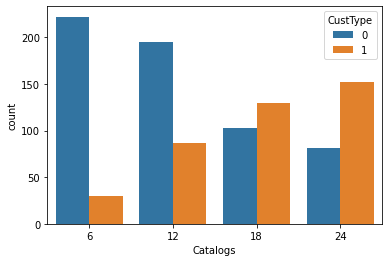

In [208]:
sns.countplot(x='Catalogs' , hue='CustType' , data=df)
plt.show()

# Model Fitting

In [209]:
mod1 = smf.glm('CustType~C(Age)+C(Gender)+C(OwnHome)+C(Married)+C(Location)+Salary+C(Children)+C(History)+C(Catalogs)' , data=df ,
              family = sm.families.Binomial())
reg1=mod1.fit()
print(reg1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               CustType   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -230.33
Date:                Sat, 24 Jul 2021   Deviance:                       460.66
Time:                        17:49:44   Pearson chi2:                     559.
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -33.6944   1.78

In [211]:
prd1 = reg1.predict(df).map(lambda x : 1 if x>0.5 else 0)
cm1 = confusion_matrix(df_f['CustType'] , prd1)
cm1

array([[549,  52],
       [ 60, 339]], dtype=int64)

In [212]:
acc1 = (cm1[0][0]+cm1[1][1])/np.sum(cm1)
acc1

0.888

In [213]:
aic1 = reg1.aic
aic1

494.66104515206735

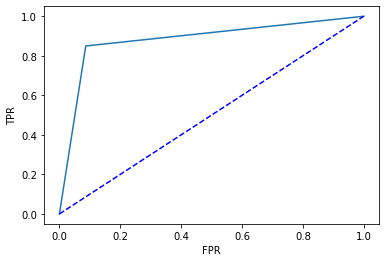

In [216]:
fpr , tpr , th = roc_curve(df_f['CustType'] , prd1)
x,y = np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(fpr , tpr , '-')
plt.plot(x,y , 'b--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [217]:
auc1 = roc_auc_score(df['CustType'] , prd1)
auc1

0.8815507987939899

From the Summary History,Gender,OwnHome,Married don't seem significant . Removing History and fitting the model again

In [224]:
mod2 = smf.glm('CustType~C(Age)+C(Gender)+C(OwnHome)+C(Married)+C(Location)+Salary+C(Children)+C(Catalogs)' , data=df ,
              family = sm.families.Binomial())
reg2=mod2.fit()
print(reg2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               CustType   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.65
Date:                Sat, 24 Jul 2021   Deviance:                       567.29
Time:                        17:56:30   Pearson chi2:                 1.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.6193      0

In [243]:
prd2 = reg2.predict(df).map(lambda x : 1 if x>0.5 else 0)
cm2 = confusion_matrix(df['CustType'] , prd2)
cm2

array([[542,  59],
       [ 64, 335]], dtype=int64)

In [226]:
acc2 = (cm2[0][0]+cm2[1][1])/np.sum(cm2)
acc2

0.877

In [227]:
aic2 = reg2.aic
aic2

595.2940720632897

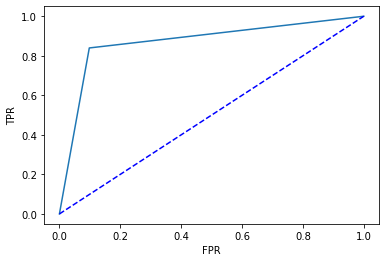

In [242]:
fpr , tpr , th = roc_curve(df['CustType'] , prd2)
x,y = np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(fpr , tpr , '-')
plt.plot(x,y , 'b--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [230]:
auc2 = roc_auc_score(df['CustType'] , prd2)
auc2

0.8707146401778156

The model did not get better . Dropping Gender

In [231]:
mod3 = smf.glm('CustType~C(Age)+C(OwnHome)+C(Married)+C(Location)+Salary+C(Children)+C(Catalogs)' , data=df ,
              family = sm.families.Binomial())
reg3=mod3.fit()
print(reg3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               CustType   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.94
Date:                Sat, 24 Jul 2021   Deviance:                       567.89
Time:                        18:00:07   Pearson chi2:                 1.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.5433      0

In [240]:
prd3 = reg3.predict(df).map(lambda x : 1 if x>0.5 else 0)
cm3 = confusion_matrix(df['CustType'] , prd3)
cm3

array([[544,  57],
       [ 65, 334]], dtype=int64)

In [233]:
acc3 = (cm3[0][0]+cm3[1][1])/np.sum(cm3)
acc3

0.878

In [234]:
aic3=reg3.aic
aic3

593.8865749294762

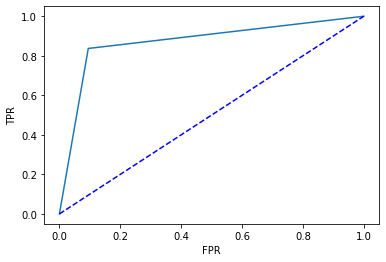

In [241]:
fpr , tpr , th = roc_curve(df['CustType'] , prd3)
x,y = np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(fpr , tpr , '-')
plt.plot(x,y , 'b--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [237]:
auc3 = roc_auc_score(df['CustType'] , prd3)
auc3

0.8711254008565508

Dropping OwnHome

In [238]:
mod4 = smf.glm('CustType~C(Age)+C(Married)+C(Location)+Salary+C(Children)+C(Catalogs)' , data=df ,
              family = sm.families.Binomial())
reg4=mod4.fit()
print(reg4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               CustType   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -284.58
Date:                Sat, 24 Jul 2021   Deviance:                       569.15
Time:                        18:36:27   Pearson chi2:                 1.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.5510      0

In [239]:
prd4 = reg4.predict(df).map(lambda x : 1 if x>0.5 else 0)
cm4 = confusion_matrix(df['CustType'] , prd4)
cm4

array([[541,  60],
       [ 68, 331]], dtype=int64)

In [244]:
acc4 = (cm4[0][0]+cm4[1][1])/np.sum(cm4)
acc4

0.872

In [245]:
aic4=reg4.aic
aic4

593.150837988783

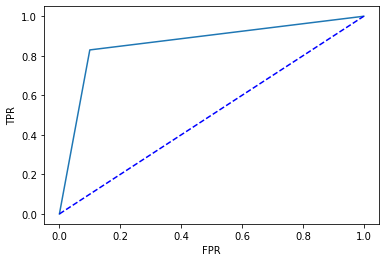

In [247]:
fpr , tpr , th = roc_curve(df['CustType'] , prd4)
x,y = np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(fpr , tpr , '-')
plt.plot(x,y , 'b--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [256]:
auc4 = roc_auc_score(df['CustType'] , prd4)
auc4

0.8648701620940872

Dropping Married

In [249]:
mod5 = smf.glm('CustType~C(Age)+C(Location)+Salary+C(Children)+C(Catalogs)' , data=df ,
              family = sm.families.Binomial())
reg5 = mod5.fit()
print(reg5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               CustType   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -285.12
Date:                Sat, 24 Jul 2021   Deviance:                       570.23
Time:                        18:39:28   Pearson chi2:                 1.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.5603      0

In [250]:
prd5 = reg5.predict(df).map(lambda x : 1 if x>0.5 else 0)
cm5 = confusion_matrix(df['CustType'] , prd5)
cm5

array([[540,  61],
       [ 64, 335]], dtype=int64)

In [251]:
acc5 = (cm5[0][0]+cm5[1][1])/np.sum(cm5)
acc5

0.875

In [252]:
aic5=reg5.aic
aic5

592.2310631311896

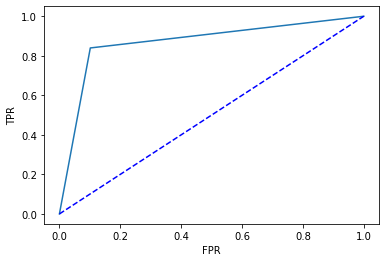

In [254]:
fpr , tpr , th = roc_curve(df['CustType'] , prd5)
x,y = np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(fpr , tpr , '-')
plt.plot(x,y , 'b--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [255]:
auc5= roc_auc_score(df['CustType'] , prd5)
auc5

0.8690507466670002

Mod1 has highest accuracy but it has insignificant variables as well . Mod5 has no insignificant variables and the accuracy is almost identical to the mod1 . Hence mod5 is the final model.